# Votre premier réseau avec un neurone en utilisant la bibliothèque keras 2.0
Modifiez le learning rate, le nombre d'epochs ....

In [7]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras import initializers
from keras.optimizers import SGD, Adam
import numpy as np

#my_init = initializers.Zeros() 
my_init = initializers.Ones()
#my_init = initializers.RandomUniform(minval=0.0, maxval=1.0)
#normalizer = preprocessing.Normalization()
model=Sequential() # network with linear layer only
#pour La couche d'entrée, input_shape doit être égale à 1 + couche 3 neurones units = 3
model.add(Dense(units=3,input_shape=[2],activation= 'sigmoid',kernel_initializer = my_init))
model.add(Dense(units=1,activation= 'sigmoid'))

#Création du réseau ("adam "alternatif à "sgd")
#opt = SGD(learning_rate=0.01) #w = w - learning_rate * gradient

opt = Adam(learning_rate=0.5) # learning rate : pas d'apprentissage pour la correction de l'erreur
#model.compile(loss='mean_squared_error',optimizer=opt)

print("")
print("Weights: \n")
print(model.layers[0].get_weights())


#set weights layer 0
coeff = np.array([[-1.,1,-0.5],[2,1,-1]])
biais = np.array([0,-2,3])
poids = [coeff,biais]
model.layers[0].set_weights(poids)
#Print weights
#set weights layer 1
coeff = np.array([[1.0],[1.0],[1]])
biais = np.array([0])
poids = [coeff,biais]
model.layers[1].set_weights(poids)
#print("pertes :",hist.history['loss'][-1])
#Prédire les nombres
print("prédictions  :\n")
entree1 = np.array( [[1,2]])
print(model.predict(entree1))



Weights: 

[array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32), array([0., 0., 0.], dtype=float32)]
prédictions  :

1/1 [==============================] - 0s 50ms/step
[[0.9093803]]


1250/1250 [==============================] - 1s 931us/step
[[0.7407842]
 [0.7404409]
 [0.7401151]
 ...
 [0.8807784]
 [0.8807766]
 [0.8807748]]


(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Domaines de décision ...'}>)

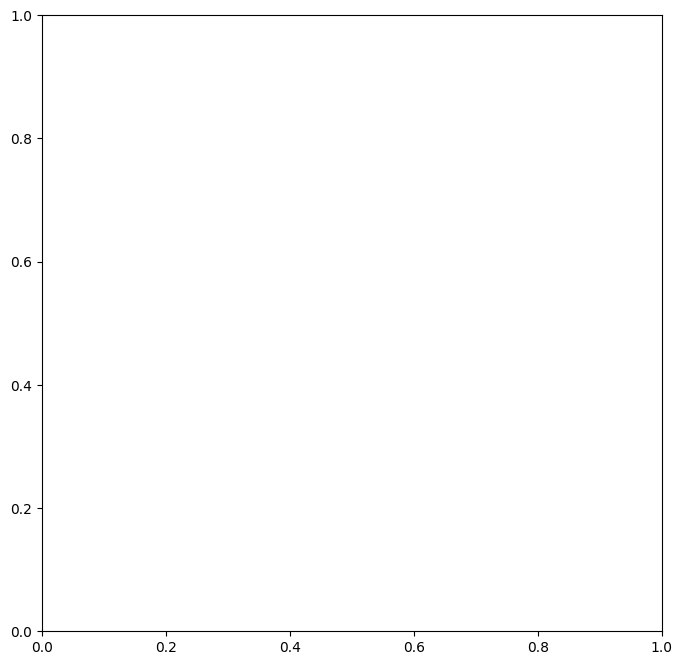

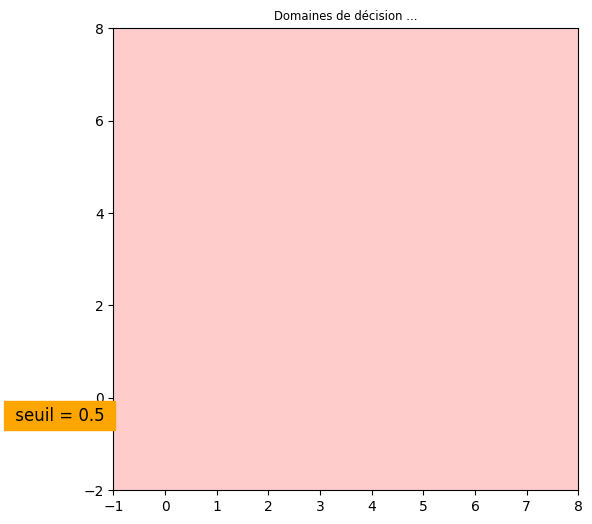

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Tracés des points avec les prédistions pour A, B et C
plt.figure(figsize=(8, 8))
plt.subplot(111)
def plot_decision_boundary2(model, steps=200,alpha=0.2,seuil=0.45):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    #alpha = alpha
    colorT = (0, 0, 0.0,0.0)# tranparent
    color2 = [(1, 0, 0,alpha),(0, 1, 0,alpha),(0, 0, 1,alpha)]
    def C_map(coul):
        cmap = (mpl.colors.ListedColormap([colorT, coul]))
        return cmap

    # Define region of interest by data limits
    xmin, xmax = -1, 8
    ymin, ymax = -2, 8
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    print(labels)
    fig = plt.figure(figsize=(6, 6))
    ax =plt.subplot(111)
    
    #for i in range(0,1): 
        # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    z = z > seuil #(seuil Threshold value)
    ax.contourf(xx, yy, z, cmap=C_map(color2[0]))
    plt.text(-3, -0.5, f" seuil = {seuil:.1f} ", fontsize = 12, backgroundcolor ='orange', ha ='left', c ='black')
    plt.title("Domaines de décision ...", fontsize="small")
    
    
    return fig, ax

XY = [[-1,-2], [9, 8]]

plot_decision_boundary2(model, alpha=0.2)
